Lo primero es importar las bibliotecas:
Biblioteca NumPy se utiliza para operaciones numéricas en Python.

From matplotlib import pyplot as plt: Importa el módulo pyplot de la biblioteca Matplotlib y lo asigna a la abreviatura plt. Matplotlib es una biblioteca para la creación de gráficos.

%matplotlib inline: Este comando es específico de los cuadernos Jupyter se utiliza para que las visualizaciones generadas por Matplotlib se muestren en línea dentro del cuaderno en lugar de en una ventana emergente separada.

In [1]:

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


Primero se define una función llamada generate_sinusoid y esto genera una señal sinusoidal.

Se asignan parametros y con la funcion generate_sinusoid se llaman para generar la señal.

Y se vizualiza con una gráfica por medio de la biblioteca matplotlib.




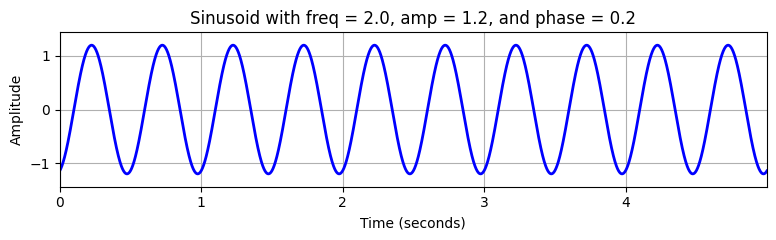

In [2]:
def generate_sinusoid(dur=1, amp=1, freq=1, phase=0, Fs=100):

    num_samples = int(Fs * dur)
    t = np.arange(num_samples) / Fs
    x = amp * np.sin(2 * np.pi * (freq * t - phase))
    return x, t
# asignacion de parametros
amp = 1.2
freq = 2
phase = 0.2
x, t = generate_sinusoid(dur=5, amp=amp, freq=freq, phase=phase, Fs=1000)

plt.figure(figsize=(8, 2.5))
plt.plot(t, x, color='blue', linewidth=2.0, linestyle='-')
plt.xlim([0, t[-1]])
plt.ylim([-amp*1.2, amp*1.2])
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Sinusoid with freq = %.1f, amp = %.1f, and phase = %.1f' % (freq, amp, phase))
plt.grid()
plt.tight_layout()


Se define la funcion generate_example_signal que genera una señal combinando tres señales con diferentes frecuencias.

In [3]:
#sampling
def  generate_example_signal ( dur = 1 ,  Fs = 100 ):


    N  =  int ( Fs  *  dur )#calcula el numero de muestras
    t  =  np . arange ( N )  /  Fs #genera un array "t" que representa el tiempo
    # tres señales con diferente frecuencias y amplitudes
    x  =  1  *  np . sin ( 2  *  np . pi  *  ( 1.9  *  t  -  0.3 ))
    x  +=  0.5  *  np . sin ( 2  *  np . pi  *  ( 6.1  *  t  -  0.1 ))
    x  +=  0.1  *  np . sin ( 2  *  np . pi  *  ( 20  *  t  -  0.2 ))
    return  x ,  t #devuelve dos arrays NumPy: x, que contiene la señal combinada, y t, que contiene los tiempos correspondientes


Nuevamente se utiliza generate_example_signal para generar una señal compuesta de dos señales

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_example_signal(Fs, dur):

    N = int(Fs * dur) #calcula el numero de muestras
    t = np.arange(N) / Fs #genera un array "t" que representa el tiempo
    # dos señales con diferente frecuencias y amplitudes
    x = 1 * np.sin(2 * np.pi * (1.9 * t - 0.3))
    x += 0.5 * np.sin(2 * np.pi * (6.1 * t - 0.1))
    return x, t  #devuelve dos arrays NumPy: x, que contiene la señal combinada, y t, que contiene los tiempos correspondientes.


Se define la función sampling_equidistant:Toma como entrada una señal continua (x_1 y x_2 )muestreada a tiempos t_1 con frecuencia de muestreo (Fs_1 y Fs_1).

Se genera una señal continua x_1 y sus tiempos asociados t_1 utilizando la función generate_example_signal.

Se llama a la función sampling_equidistant con la señal continua,obteniendo la señal discreta x_2 y los tiempos discretos t_2.

<ipython-input-5-367204453843>:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_2, x_2, linefmt='r', markerfmt='ro', basefmt='None', use_line_collection=True)
<ipython-input-5-367204453843>:38: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(len(x_2)), x_2, linefmt='r', markerfmt='ro', basefmt='None', use_line_collection=True)


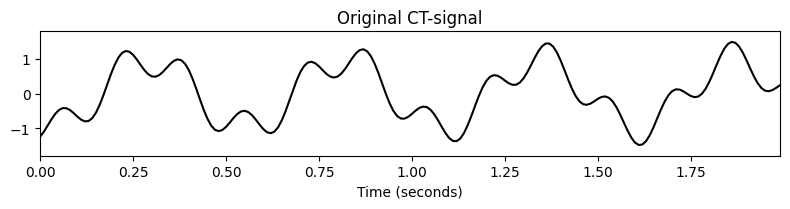

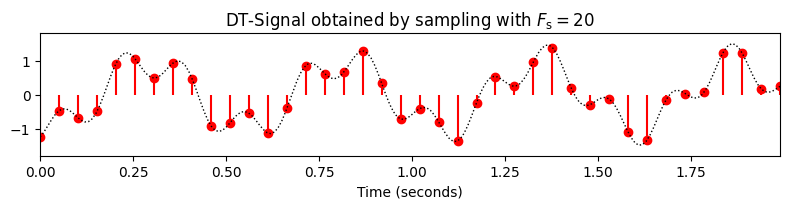

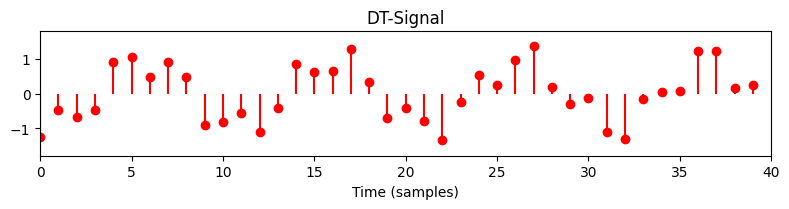

In [5]:
def sampling_equidistant(x_1, t_1, Fs_2, dur=None):

    if dur is None:
        dur = len(t_1) * (t_1[1] - t_1[0])  # Corregir el cálculo de duracion si t_1 no es equidistante
    N = int(Fs_2 * dur)
    t_2 = np.linspace(t_1[0], t_1[-1], N)  # Crear t_2 con N muestras entre el primer y último tiempo de t_1
    x_2 = np.interp(t_2, t_1, x_1)
    return x_2, t_2

Fs_1 = 100
x_1, t_1 = generate_example_signal(Fs=Fs_1, dur=2)

Fs_2 = 20
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)

#Se crean tres gráficos utilizando Matplotlib para mostrar la señal
#Primer gráfico: Muestra la señal continua original en función del tiempo
plt.figure(figsize=(8, 2.2))
plt.plot(t_1, x_1, 'k')
plt.title('Original CT-signal')
plt.xlabel('Time (seconds)')
plt.ylim([-1.8, 1.8])
plt.xlim([t_1[0], t_1[-1]])
plt.tight_layout()

#Segundo gráfico:Muestra la señal discreta (x_2) obtenida mediante el muestreo
plt.figure(figsize=(8, 2.2))
plt.stem(t_2, x_2, linefmt='r', markerfmt='ro', basefmt='None', use_line_collection=True)
plt.plot(t_1, x_1, 'k', linewidth=1, linestyle='dotted')
plt.title(r'DT-Signal obtained by sampling with $F_\mathrm{s} = %.0f$' % Fs_2)
plt.xlabel('Time (seconds)')
plt.ylim([-1.8, 1.8])
plt.xlim([t_1[0], t_1[-1]])
plt.tight_layout()

#Tercer gráfico:Muestra la misma señal discreta (x_2) en función del número de muestras
plt.figure(figsize=(8, 2.2))
plt.stem(range(len(x_2)), x_2, linefmt='r', markerfmt='ro', basefmt='None', use_line_collection=True)
plt.title(r'DT-Signal')
plt.xlabel('Time (samples)')
plt.ylim([-1.8, 1.8])
plt.xlim([0, len(t_2)])
plt.tight_layout()

plt.show()


Se define la función, llamada reconstruction_sinc, simula el proceso de reconstrucción de una señal continua.

In [6]:
#aliasing
def reconstruction_sinc(x, t, t_sinc):

    Fs = 1 / t[1]#Calcula la frecuencia de muestreo
    x_sinc = np.zeros(len(t_sinc)) # Inicializa un array de ceros que representará la señal reconstruida en los tiempos
    #Utiliza un bucle for para recorrer todas las muestras de la señal original
    for n in range(0, len(t)):
        x_sinc += x[n] * np.sinc(Fs * t_sinc - n)#Calcula la contribución de la n-ésima muestra a la señal reconstruida usando la función sinc
    return x_sinc

Se define la función plot_signal_reconstructed que toma como entrada los tiempos y las señales de una señal continua original los tiempos y las muestras obtenidas mediante muestreo y los tiempos y las señales reconstruidas (t_sinc y x_sinc).

Luego se utiliza Matplotlib para crear un gráfico que muestra la señal continua original, las muestras obtenidas mediante muestreo, y la señal reconstruida mediante interpolación sinc.

<ipython-input-7-25b178a415f6>:5: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_2, x_2, linefmt='r:', markerfmt='r.', basefmt='None', label='Samples', use_line_collection=True)


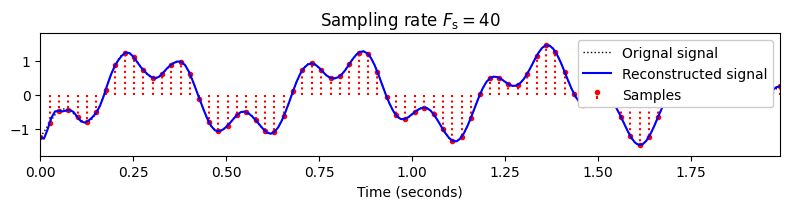

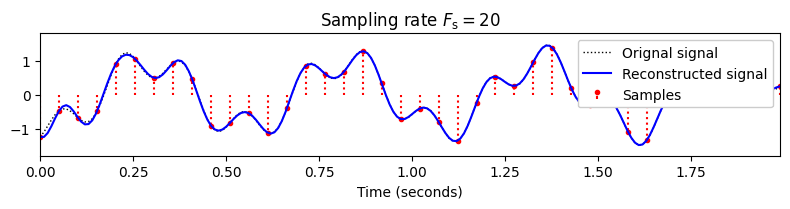

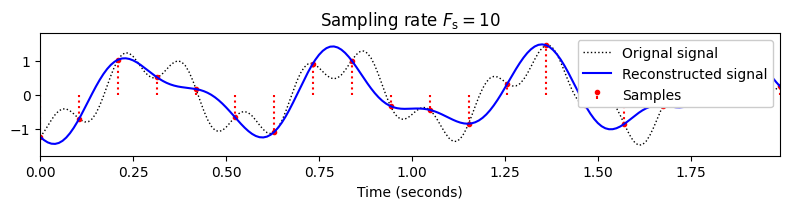

In [7]:
def plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc, figsize=(8, 2.2)):

    plt.figure(figsize=figsize)
    plt.plot(t_1, x_1, 'k', linewidth=1, linestyle='dotted', label='Orignal signal')
    plt.stem(t_2, x_2, linefmt='r:', markerfmt='r.', basefmt='None', label='Samples', use_line_collection=True)
    plt.plot(t_sinc, x_sinc, 'b', label='Reconstructed signal')
    plt.title(r'Sampling rate $F_\mathrm{s} = %.0f$' % (1/t_2[1]))
    plt.xlabel('Time (seconds)')
    plt.ylim([-1.8, 1.8])
    plt.xlim([t_1[0], t_1[-1]])
    plt.legend(loc='upper right', framealpha=1)
    plt.tight_layout()
    plt.show()

#Se realiza el muestreo de la señal continua original (x_1, t_1) con tasas de muestreo de 40 Hz, 20 Hz y 10 Hz
Fs_2 = 40
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)#para reconstruir la señal continua a partir de las muestras obtenidas mediante interpolación sinc
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)# visualizar el efecto de diferentes tasas de muestreo en la reconstrucción

Fs_2 = 20
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

Fs_2 = 10
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)




Se define la función generate_sinusoid esta toma como entrada la duración de la señal, la frecuencia de muestreo y la frecuencia de la señal sinusoidal.

La función sampling_equidistant toma como entrada la señal continua, los tiempos asociados a la señal continua, la nueva frecuencia de muestreo deseada, y la duración de la señal.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sinusoid(dur, Fs, freq):
    t = np.arange(0, dur, 1/Fs)
    x = np.sin(2 * np.pi * freq * t)
    return x, t

def sampling_equidistant(x_1, t_1, Fs_2, dur=None):

    if dur is None:
        dur = len(t_1) * (t_1[1] - t_1[0])  # Corregir el cálculo de dur si t_1 no es equidistante
    N = int(Fs_2 * dur)
    t_2 = np.linspace(t_1[0], t_1[-1], N)  # Crear t_2 con N muestras entre el primer y último tiempo de t_1
    x_2 = np.interp(t_2, t_1, x_1)#para interpolar y obtener las muestras correspondientes de la señal continua en los nuevos tiempos t_2
    return x_2, t_2

Fs_1 = 128 #Se especifica una frecuencia de muestreo inicial de 128 Hz
x_1, t_1 = generate_sinusoid(dur=2, Fs=Fs_1, freq=10)#Se utiliza la función generate_sinusoid para generar una señal sinusoidal con una duración de 2 segundos, frecuencia de 10 Hz y la frecuencia de muestreo


Se define la función reconstruction_sinc que toma como entrada la señal muestreada x, los tiempos asociados a la señal muestreada t, y los tiempos en los que se realizará la interpolación sinc t_sinc.

Se define la función plot_signal_reconstructed que toma como entrada los tiempos y las señales de una señal continua original (t_1 y x_1), los tiempos y las muestras obtenidas mediante muestreo (t_2 y x_2), y los tiempos y las señales reconstruidas mediante interpolación sinc (t_sinc y x_sinc).

Utiliza Matplotlib para crear un gráfico que muestra la señal continua original, las muestras obtenidas mediante muestreo y la señal reconstruida mediante interpolación sinc.

[2]


<ipython-input-9-51e4dbde8743>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(t_2, x_2, linefmt='r:', markerfmt='r.', basefmt='None', label='Samples', use_line_collection=True)


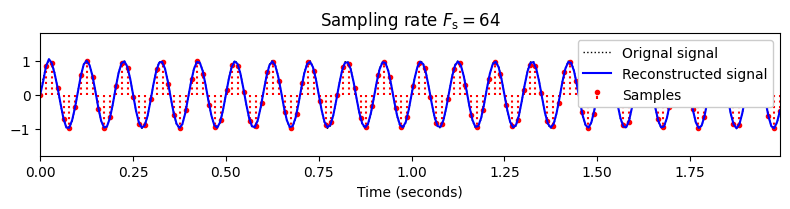

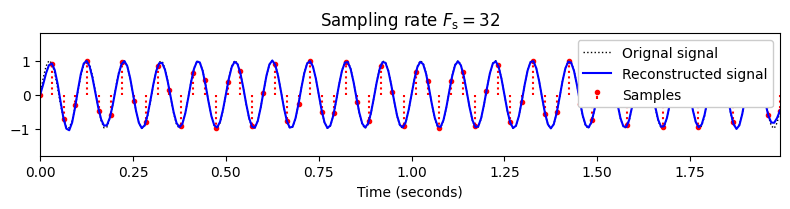

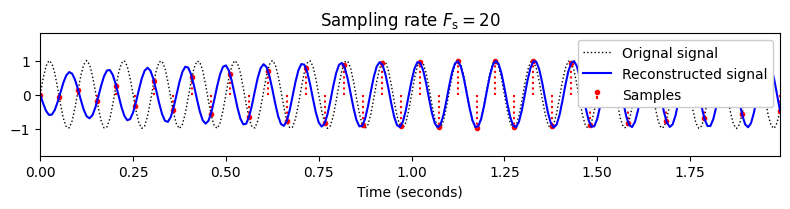

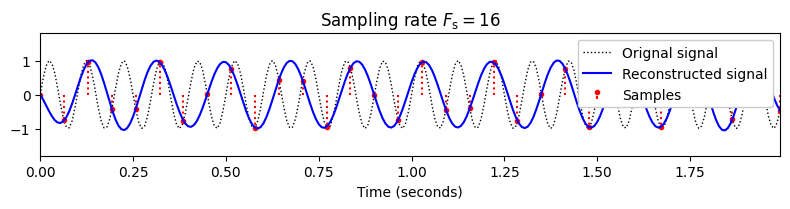

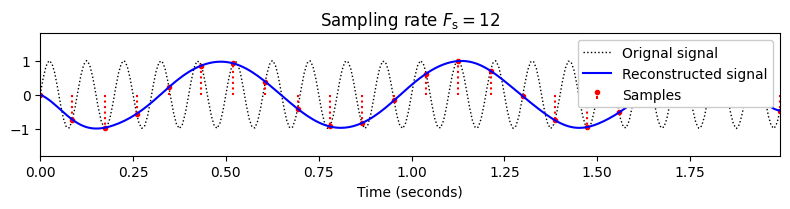

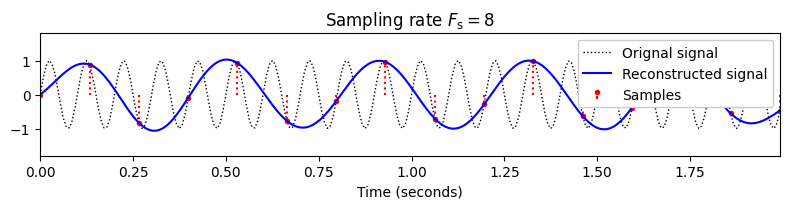

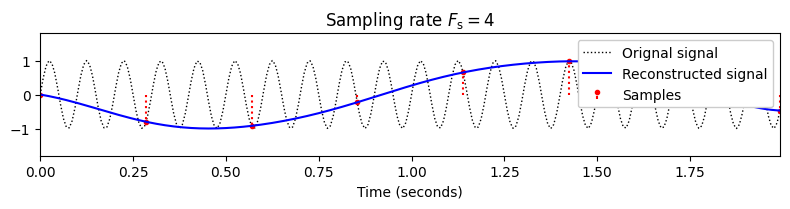

In [9]:
def reconstruction_sinc(x, t, t_sinc):

    Fs = 1 / t[1]
    x_sinc = np.zeros(len(t_sinc))
    for n in range(0, len(t)):
        x_sinc += x[n] * np.sinc(Fs * t_sinc - n)
    return x_sinc

def plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc, figsize=(8, 2.2)):

    plt.figure(figsize=figsize)
    plt.plot(t_1, x_1, 'k', linewidth=1, linestyle='dotted', label='Orignal signal')
    plt.stem(t_2, x_2, linefmt='r:', markerfmt='r.', basefmt='None', label='Samples', use_line_collection=True)
    plt.plot(t_sinc, x_sinc, 'b', label='Reconstructed signal')
    plt.title(r'Sampling rate $F_\mathrm{s} = %.0f$' % (1/t_2[1]))
    plt.xlabel('Time (seconds)')
    plt.ylim([-1.8, 1.8])
    plt.xlim([t_1[0], t_1[-1]])
    plt.legend(loc='upper right', framealpha=1)
    plt.tight_layout()
    plt.show()

#Los gráficos se generan para tasas de muestreo de 64 Hz, 32 Hz, 20 Hz, 16 Hz, 12 Hz, 8 Hz, y 4 Hz.
Fs_2 = 64
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

Fs_2 = 32
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

Fs_2 = 20
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

Fs_2 = 16
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

Fs_2 = 12
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

Fs_2 = 8
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

Fs_2 = 4
x_2, t_2 = sampling_equidistant(x_1, t_1, Fs_2)
t_sinc = t_1
x_sinc = reconstruction_sinc(x_2, t_2, t_sinc)
plot_signal_reconstructed(t_1, x_1, t_2, x_2, t_sinc, x_sinc)

